Numeric Data / Sayısal Veriler
- culmen_length_mm : gaga uzunluğu
- culmen_depth_mm : gaga derinliği
- flipper_lenght_mm : kanat uzunluğu
- body_mass_g : vücut kütlesi

Categorical Data / Kategorik Veriler
- species : tür
- island : ada
- sex : cinsiyet

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns 

In [3]:
df = pd.read_csv("penguins_size.csv")

In [4]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df = df[~pd.isnull(df["sex"])]

In [8]:
(df["sex"] == '.').sum()

1

In [9]:
df = df[df["sex"] != '.']

In [10]:
df.to_csv("temizlenmis_penguins_size.csv",index=False)

In [11]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

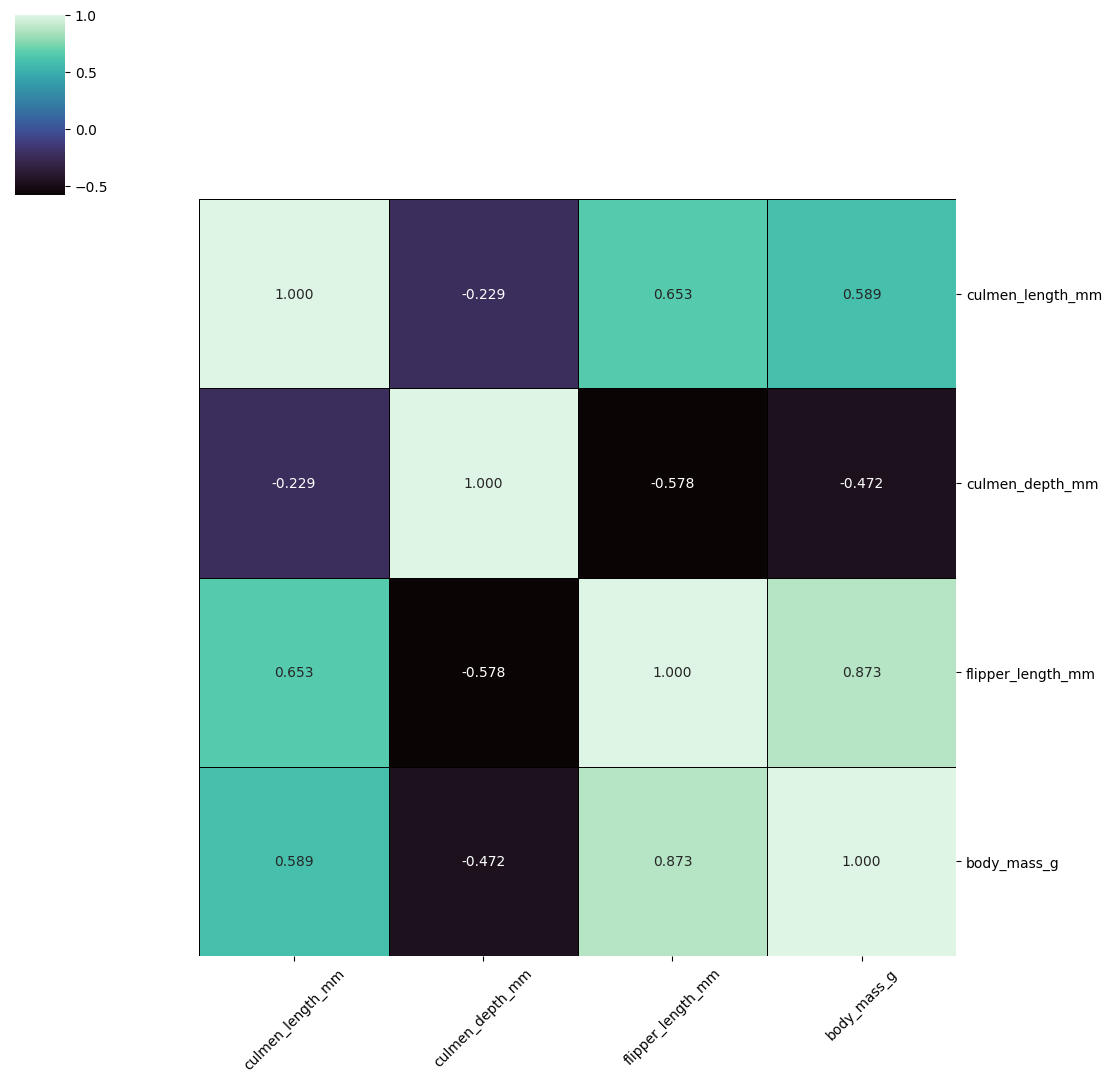

In [12]:
heatMapDf = df.loc[:,["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]]

g = sns.clustermap(heatMapDf.corr(),
               annot=True,
               linewidths=0.5,
               linecolor = "black",
               fmt='.3f',
               cmap="mako",
               cbar=True,
               square=True,
               row_cluster=False, 
               col_cluster=False)

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=45)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)



plt.show()

In [13]:
pd.unique(df.species)

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [14]:
pd.unique(df.island)

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [15]:
df["body_mass_g"].max()

6300.0

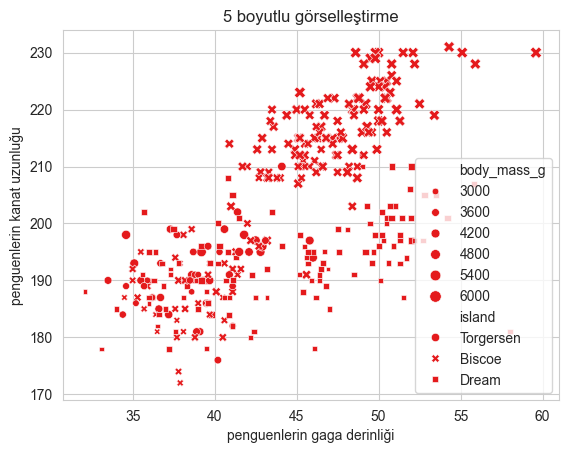

In [22]:
sns.set_style("whitegrid")
sns.set_palette("Set1")
sns.scatterplot(data=df,
                x="culmen_length_mm",
                y="flipper_length_mm",
                hue="sex",
                style="island",
                size="body_mass_g",
                size_order=(2700,6300),
                palette={"MALE":"blue","FEMALE":"pink"})
plt.xlabel("penguenlerin gaga derinliği")
plt.ylabel("penguenlerin kanat uzunluğu")
plt.title("5 boyutlu görselleştirme")
plt.show()

Index(['Dream', 'Biscoe', 'Torgersen'], dtype='object', name='island')


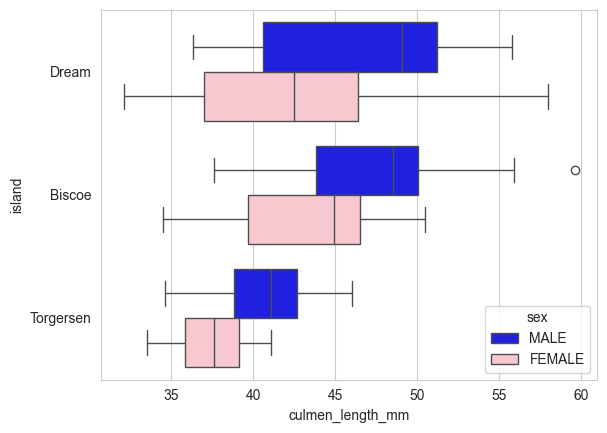

In [17]:
order = df.groupby('island')['culmen_length_mm'].var().sort_values().index[::-1]
print(order)

sns.boxplot(data=df,
            y="island",
            x="culmen_length_mm",
            hue="sex",
            orient ="h",
            palette={"MALE":"blue","FEMALE":"pink"},
            fill=True,
            order=order)
plt.show()

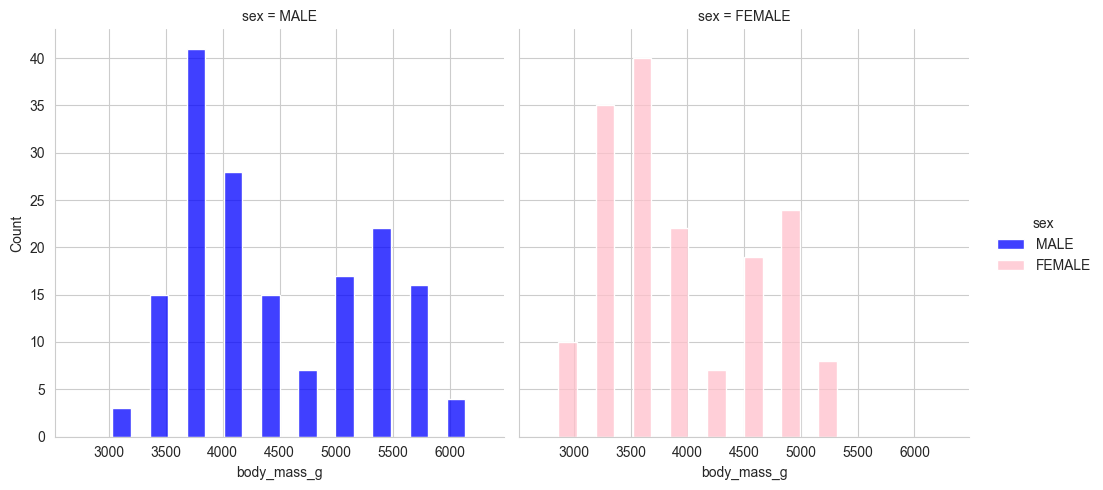

In [18]:
sns.displot(data=df,
            x="body_mass_g",
            hue="sex",
            col="sex",
            multiple="dodge",
            palette={"MALE":"blue","FEMALE":"pink"})
plt.show()

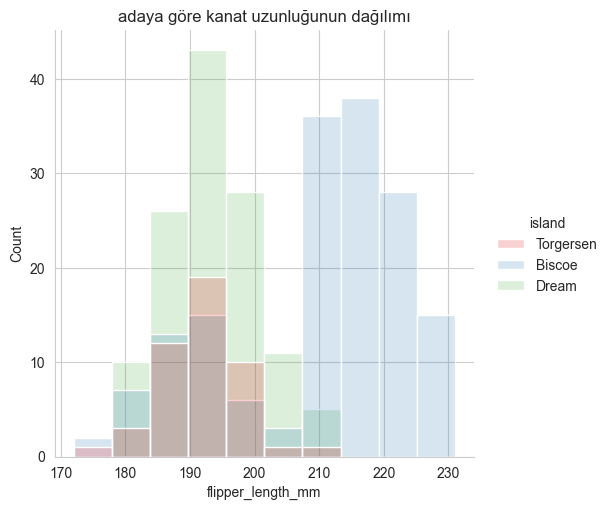

In [19]:
sns.displot(data=df,
            x="flipper_length_mm",
            hue="island",
            fill = True,
            alpha =0.2)
plt.title("adaya göre kanat uzunluğunun dağılımı")
plt.show()